In [59]:
%reload_ext autoreload
%autoreload 2

In [60]:
import autorootcwd
from tqdm import tqdm

import torch
import pandas as pd
import matplotlib.pyplot as plt 

from src.utils import chord_to_id_map, id_to_chord_map
from src.data.dataset import FullChordDataset
from src.utils import get_filenames, get_raw_chord_annotation, chord_to_id, get_chord_quality, get_chord_root

# Distributions over Quality/Root

In [69]:
dataset = FullChordDataset()

all_labels = []

for i in tqdm(range(len(dataset))):
    labels = dataset[i][1]
    all_labels.extend(labels)

all_labels = [label.item() for label in all_labels]
all_labels_chords = [id_to_chord_map[label] for label in all_labels]
all_labels_series = pd.Series(all_labels_chords)

100%|██████████| 1213/1213 [00:16<00:00, 74.61it/s] 


In [70]:
qualities = [get_chord_quality(label) for label in all_labels]
qualities = pd.Series(qualities)

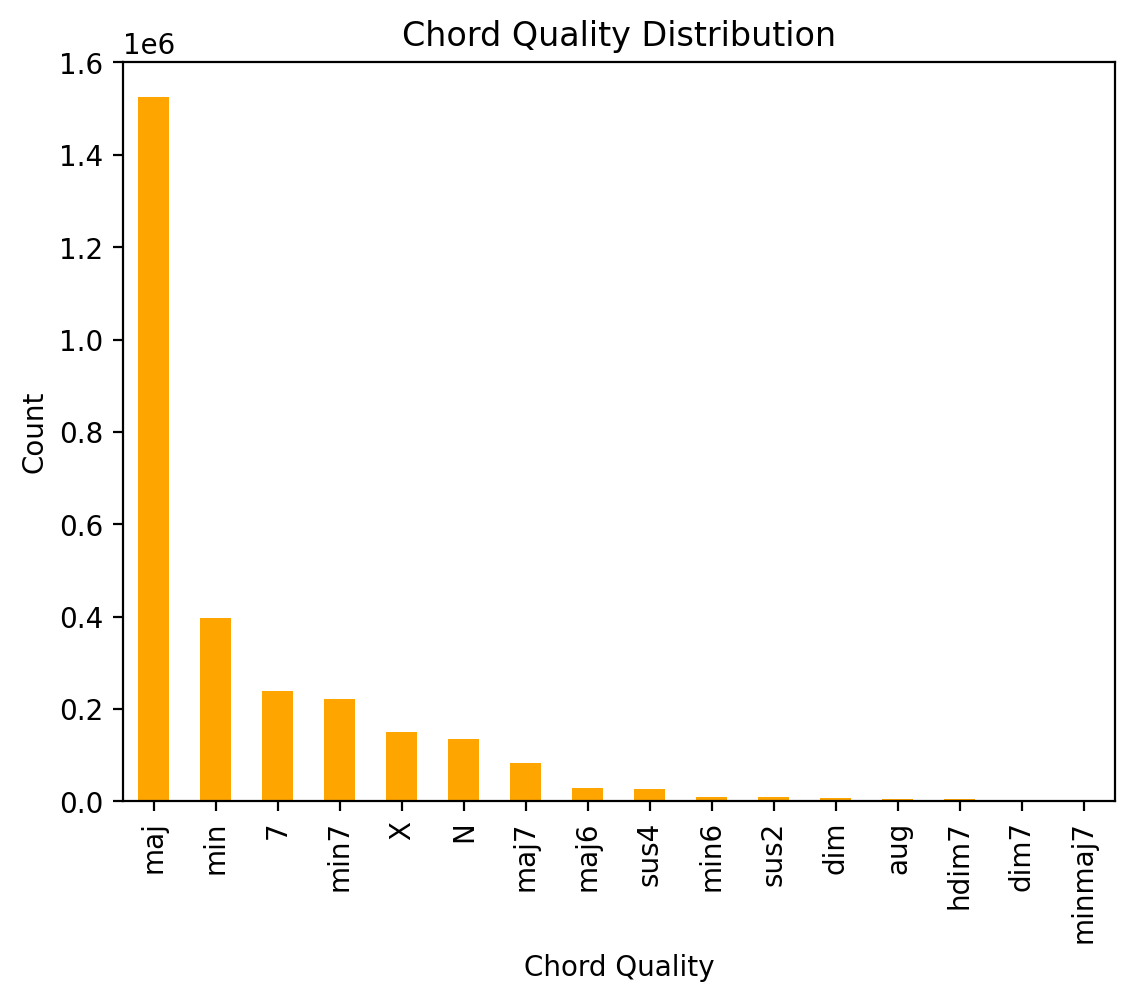

In [71]:
# Print label histogram
fig, ax = plt.subplots()
qualities.value_counts().plot(kind='bar', ax=ax, color='orange')
plt.title('Chord Quality Distribution')
plt.xlabel('Chord Quality')
plt.ylabel('Count')
plt.show()

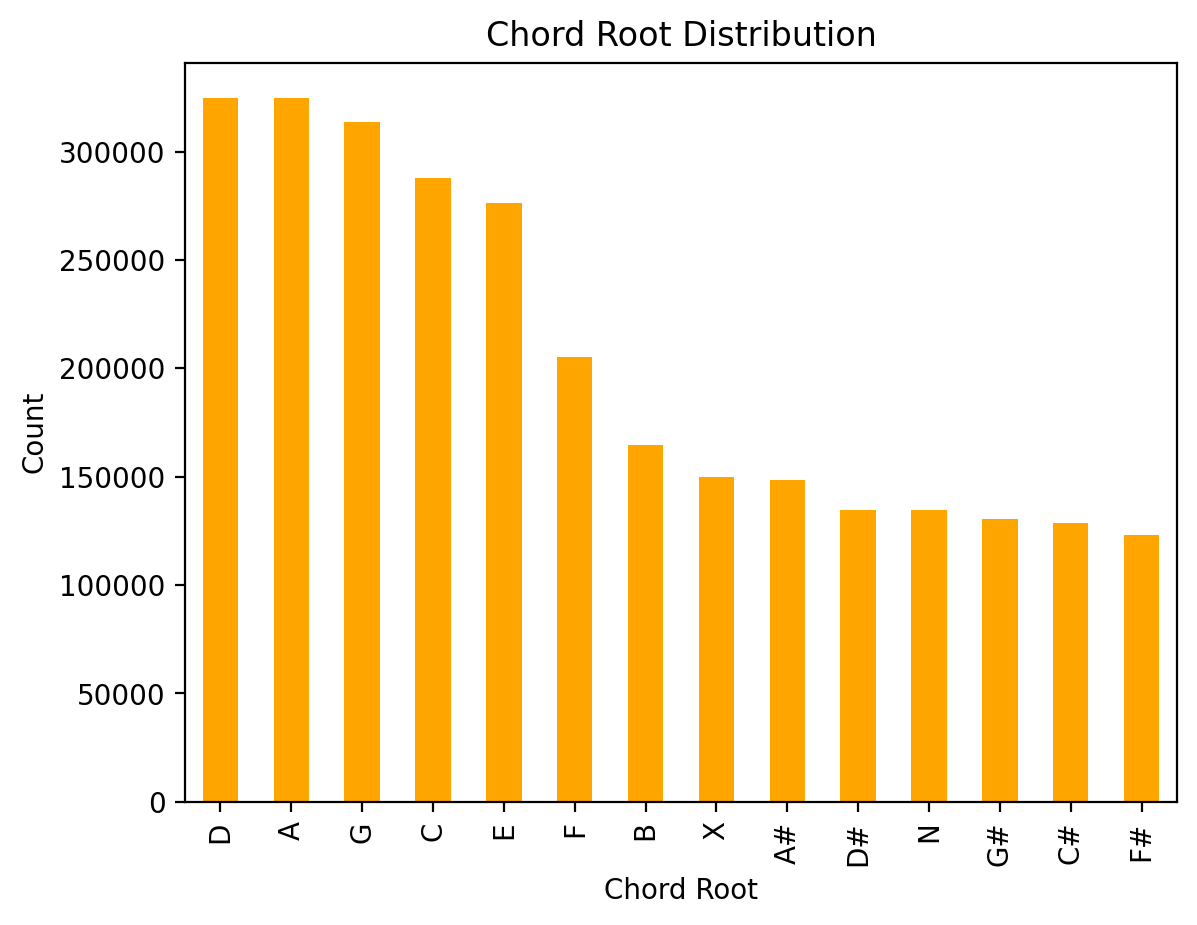

In [72]:
roots = [get_chord_root(label) for label in all_labels]
roots = pd.Series(roots)
# Print label histogram
fig, ax = plt.subplots()
roots.value_counts().plot(kind='bar', ax=ax, color='orange')
plt.title('Chord Root Distribution')
plt.xlabel('Chord Root')
plt.ylabel('Count')
plt.show()

In [73]:
chord_counts = {}
chord_durations = {}

filenames = get_filenames()
for filename in tqdm(filenames):
    chords = get_raw_chord_annotation(filename)
    for chord in chords:
        chord_id = chord_to_id(chord.value)
        chord_counts[chord_id] = chord_counts.get(chord_id, 0) + 1
        chord_durations[chord_id] = chord_durations.get(chord_id, 0) + chord.duration

# Rename ids to chords
chord_counts = {id_to_chord_map[k]: v for k, v in chord_counts.items()}
chord_counts = pd.Series(chord_counts).sort_values(ascending=False)
chord_durations = {id_to_chord_map[k]: v for k, v in chord_durations.items()}
chord_durations = pd.Series(chord_durations).sort_values(ascending=False)

100%|██████████| 1213/1213 [00:12<00:00, 100.59it/s]


In [74]:
# Convert to quality-based
quality_counts = {}
quality_durations = {}
for chord, count in chord_counts.items():
    quality = get_chord_quality(chord_to_id_map[chord])
    quality_counts[quality] = quality_counts.get(quality, 0) + count
    quality_durations[quality] = quality_durations.get(quality, 0) + chord_durations[chord]

quality_counts = pd.Series(quality_counts).sort_values(ascending=False)
quality_durations = pd.Series(quality_durations).sort_values(ascending=False)

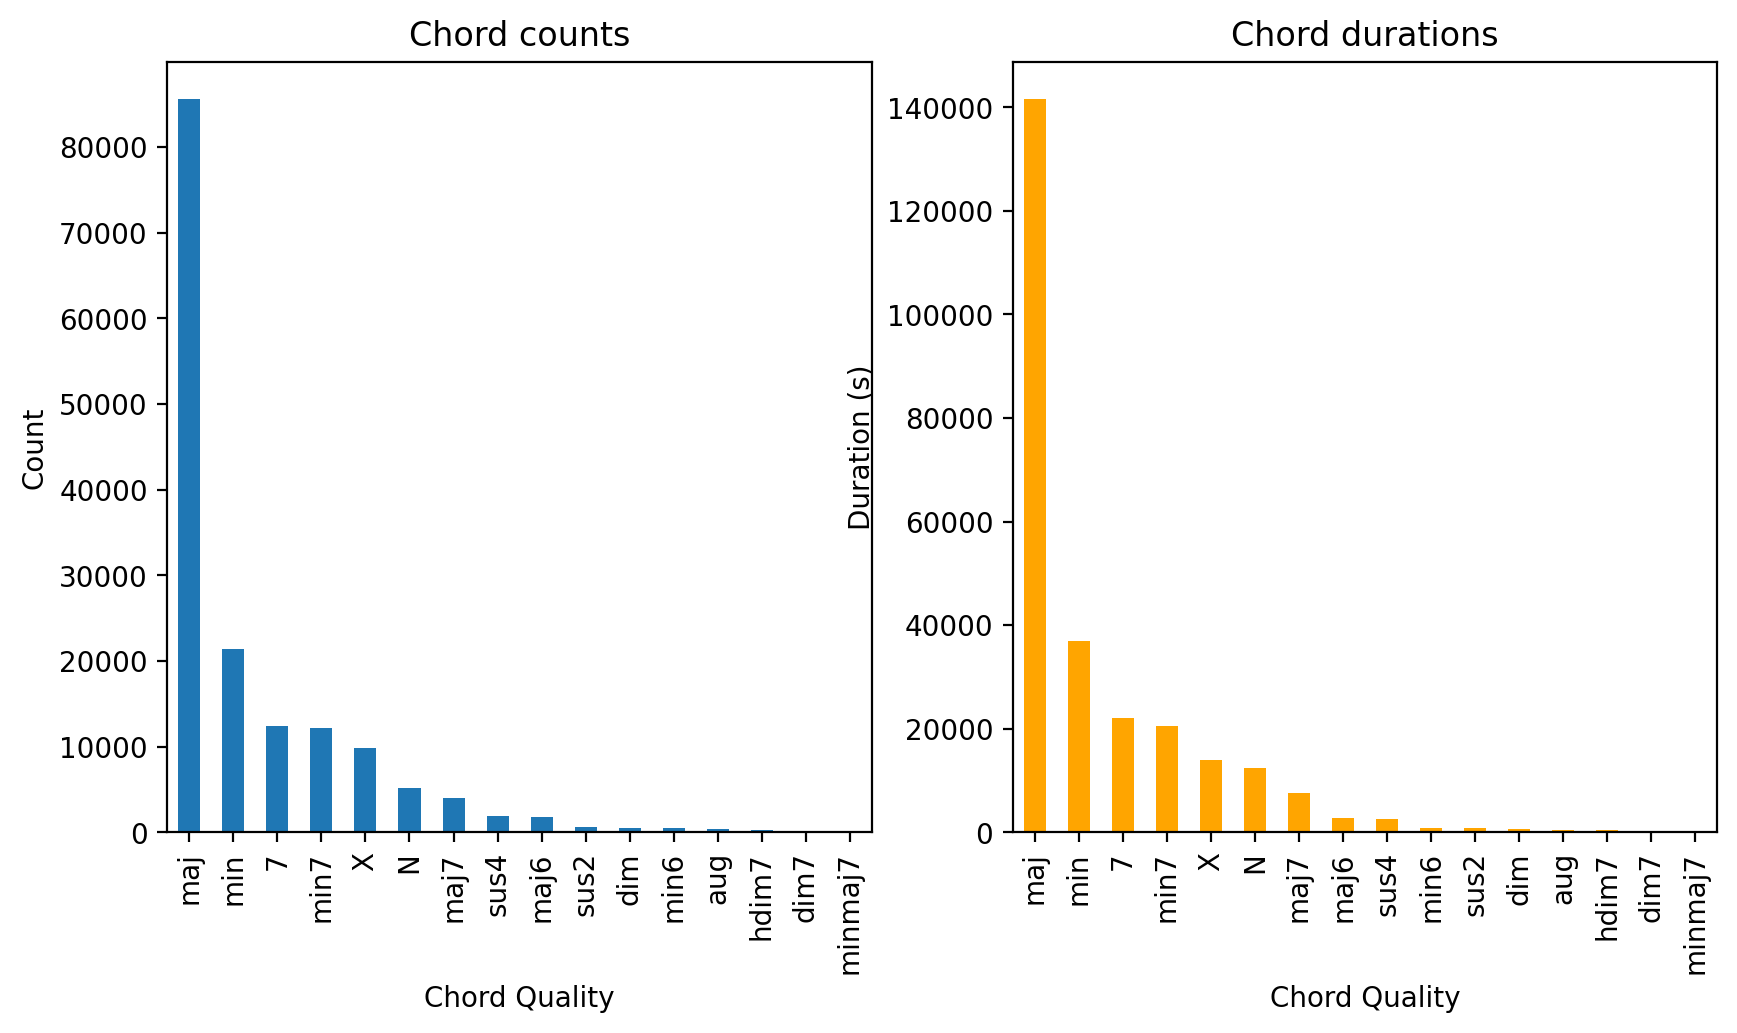

In [75]:
# Plot chord counts and durations
fig, ax = plt.subplots(1,2, figsize=(10, 5))
quality_counts.plot(kind='bar', ax=ax[0], title='Chord counts')
quality_durations.plot(kind='bar', ax=ax[1], color='orange', title='Chord durations')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Duration (s)')
ax[0].set_xlabel('Chord Quality')
ax[1].set_xlabel('Chord Quality')
plt.show()

In [76]:
# Convert to quality-based
root_counts = {}
root_durations = {}
for chord, count in chord_counts.items():
    root = get_chord_root(chord_to_id_map[chord])
    root_counts[root] = root_counts.get(root, 0) + count
    root_durations[root] = root_durations.get(root, 0) + chord_durations[chord]

root_counts = pd.Series(root_counts).sort_values(ascending=False)
root_durations = pd.Series(root_durations).sort_values(ascending=False)

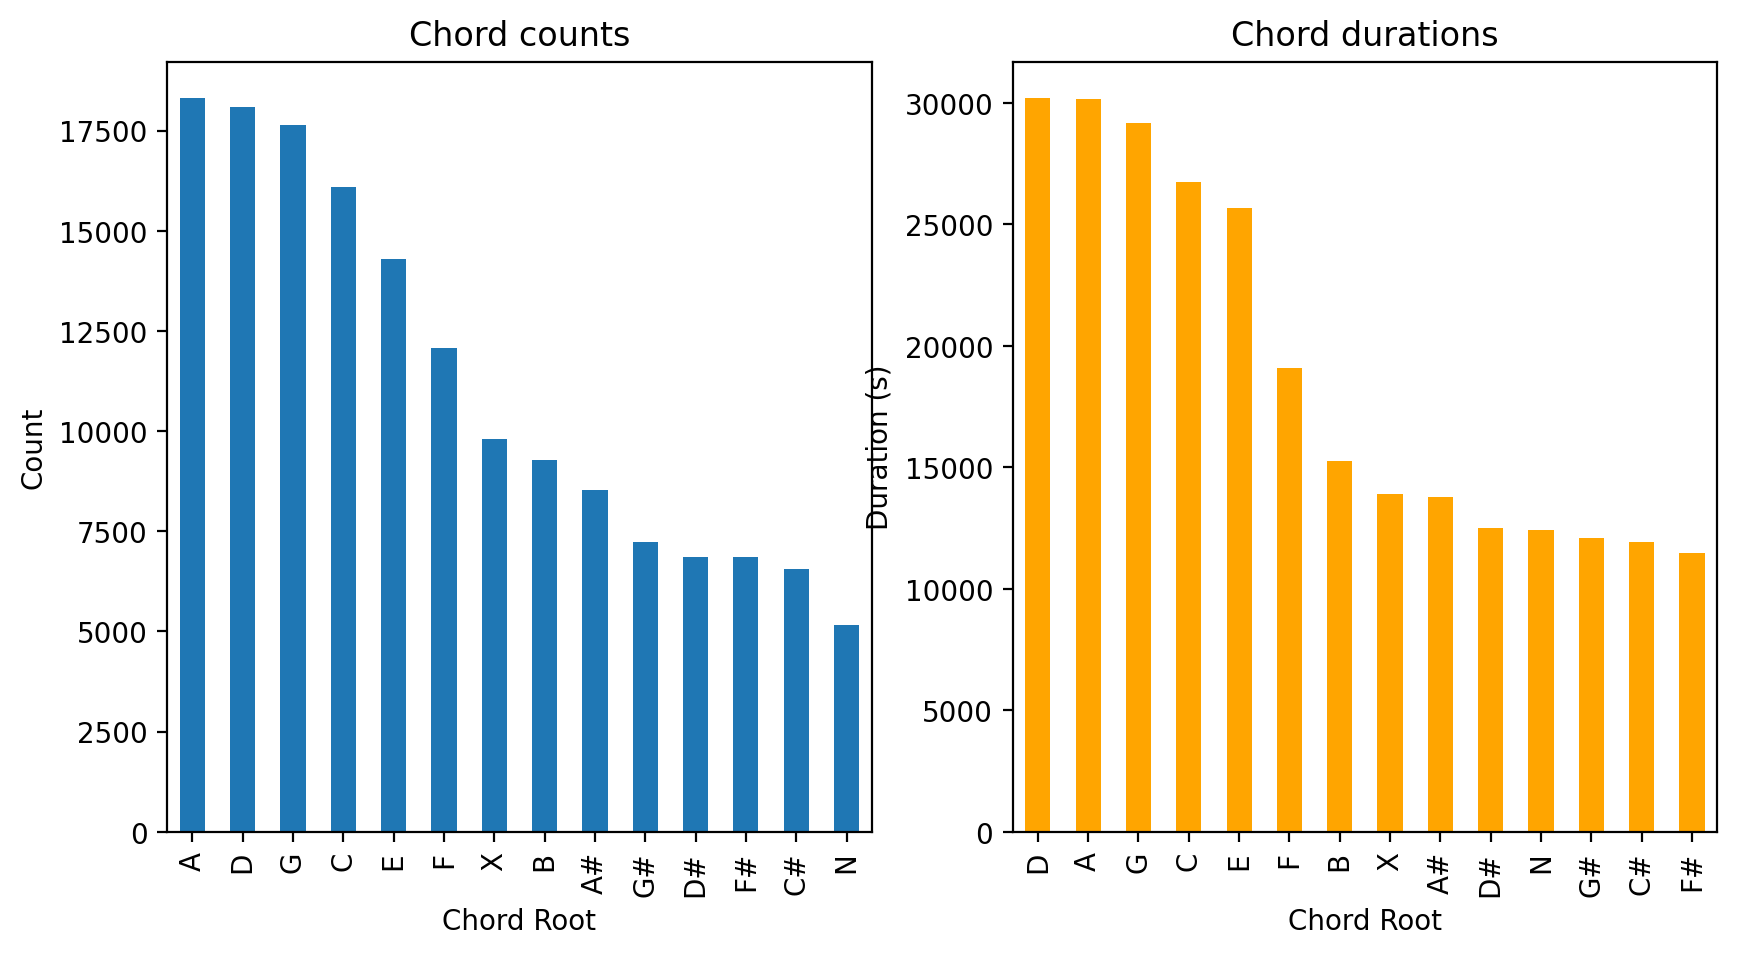

In [102]:
# Plot chord counts and durations
fig, ax = plt.subplots(1,2, figsize=(10, 5))
root_counts.plot(kind='bar', ax=ax[0], title='Chord counts')
root_durations.plot(kind='bar', ax=ax[1], color='orange', title='Chord durations')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Duration (s)')
ax[0].set_xlabel('Chord Root')
ax[1].set_xlabel('Chord Root')
plt.show()

# What about the Xs?

In [78]:
dataset = FullChordDataset()
all_song_labels = []

for i in tqdm(range(len(dataset))):
    labels = dataset[i][1]
    all_song_labels.append(labels)

100%|██████████| 1213/1213 [00:05<00:00, 225.55it/s]


In [79]:
all_song_labels = [[label.item() for label in song] for song in all_song_labels]
all_song_chords = [[id_to_chord_map[label] for label in song] for song in all_song_labels]

In [94]:
idx = 100
pd.Series(all_song_chords[idx]).value_counts()

A#:maj     557
C:7        236
F:7        236
D#:7       166
F:maj      106
G:maj      105
N          104
D#:maj     104
D:7         53
A#:7        53
C:maj       53
G:min       52
E:hdim7     52
X           52
Name: count, dtype: int64

In [95]:
# Find ALL index of X chord in song idx
all_song_chords[idx].index('X')

331

In [96]:
all_song_chords[idx][300:350]

['G:min',
 'G:min',
 'G:min',
 'G:min',
 'G:min',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'A#:maj',
 'A#:maj',
 'A#:maj',
 'A#:maj',
 'A#:maj',
 'A#:maj']

In [20]:
dataset.get_filename(60)

'donmclean_vincent(starry,starrynight)'

In [98]:
from src.utils import get_raw_chord_annotation

chords = get_raw_chord_annotation(dataset.get_filename(idx))
list([chord.value for chord in chords])

['N',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'Eb:maj/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'D:7/5',
 'G:min',
 'Bb:7/5',
 'E:hdim7',
 'F:sus4(b7)',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'Eb:maj/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'D:7/5',
 'G:min',
 'Bb:7/5',
 'E:hdim7',
 'F:sus4(b7)',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'F:maj',
 'Eb:maj',
 'F:maj',
 'Bb:maj',
 'G:maj',
 'C:maj',
 'G:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'Eb:maj/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'D:7/5',
 'G:min',
 'Bb:7/5',
 'E:hdim7',
 'F:sus4(b7)',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Eb:7/5',
 'F:maj',
 'Eb:maj',
 'F:maj',
 'Bb:maj',
 'G:maj',
 'C:ma

In [123]:
from src.utils import chord_to_id, get_pitch_classes
from harte.harte import Harte
chord_str = 'D:7(7)'
chord = Harte(chord_str)
print(chord_to_id(chord_str))
print(chord.pitchClasses)
print(chord.quality)
get_pitch_classes(chord_str)

30
[2, 6, 9, 0, 1]
major


(0, 4, 7, 10, 11)